# Carbon Tax Observations

### CS2545 - Data Science ###
### Winter, 2025 ###
### UNB, Fredericton ###
<br>

#### Group Members 

Chi Seng, Cheang | 3762588

Riley, Legere | 3756232

Matthew, Chiasson | 3725675



#### Project Proposal :
Economic activities and cost analysis in Canada
(Analyzing grocery price trends)

#### Issues addressed:  
Concerns about rising grocery costs in Canada (Reasons/Causes) since the genesis of carbon Tax.
Methodology: We will look at price trends in grocery costs throughout the year with a focus on the transition between first to second quarter (the tax season). Our approach will be mostly concerned with animal products that have a large carbon footprint. We are also interested in how the Carbon Tax affects other food products, say those that involve heavy transportation costs; Like Seafood. 


# Data Set Sources:

> [Industrial product price index, food and beverage products, monthly:](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810026603)

> [Raw materials price index for crop products, animals and animal products, monthly:](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=181002680)

> [Monthly average retail prices for selected products: Food](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810024502)

> [Annual CPI (Not seasonally adjusted)](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810000501&pickMembers%5B0%5D=1.2&cubeTimeFrame.startYear=2019&cubeTimeFrame.endYear=2024&referencePeriods=20190101%2C20240101)

# Introduction
Our project aims to analyze the price trends on grocery items and its root causes with a heavy emphasis on the relevance of Carbon Tax within the Canadian economy. We hypothesize that since the introduction of the Carbon Tax on a federal level in 2019 (some provinces have had Carbon Tax as early as 2016 [[1]](https://energynow.ca/2016/12/brief-history-canadian-carbon-tax/)), grocery prices have been steadily rising due to increasing fuel consumption and population growth. Paired with the Covid-19 pandemic, prices of groceries have since been increased to new heights and have not been decreasing gradually despite many of its causes stabilizing.[[2]](https://www.thecanadianencyclopedia.ca/en/article/carbon-pricing-in-canada)

## Project Goal

For the goal of this project we aim to show the impact that the Carbon Tax has had on the cost of groceries from 2019(the time Carbon tax was imposed nation wide) to 2024(Date when farmers received exemption on certain items). To do this, we will first gather the inflation rate for each year, then the mean annual increase of grocery costs. Then, we would be able to compare how much of the price increase was due to annual inflation, attributing the rest to the carbon tax (and other contributing factors that will be explored).

## Base inflation rates

Inflation is defined as the rate where the cost of products increases, or the rate in which a currency depreciates relative to its purchasing power. The preferred global inflation rate of many governments, including Canada have been kept at approximately 2% annually as it is said to stimulate economic growth. A manageable inflation rate can positively spur investments and drive economic growth, despite bring commonnly associated with risks such as  currency devaluation.

Canada's inflation rate is measured using the Consumer Price Index(CPI), which is calculated annually and benchmarked against a base year(eg. 2002 in our case)[[3]](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810000501&pickMembers%5B0%5D=1.2&cubeTimeFrame.startYear=2019&cubeTimeFrame.endYear=2024&referencePeriods=20190101%2C20240101). Our report will focus on comparing the CPI of earlier time periods against those following the introduction of Carbon Tax in order to gain a better understanding of its role in grocery price inflation. Historically Canada's inflation rate has been kept around 2% per annum, as illustrated in the line chart below.

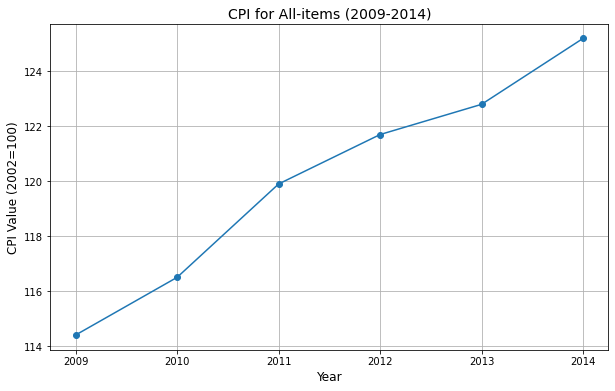

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot

cpi_2009 = pd.read_csv('Sources/2009-2014CPI.csv', sep=',', skiprows=10, nrows=16)
cpi_2009 = cpi_2009.dropna()

first_row = cpi_2009.iloc[0]
years = ['2009', '2010', '2011', '2012', '2013', '2014']
values = first_row.iloc[1:7].values

plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o')
product_name = first_row.iloc[0]  
plt.title(f"CPI for {product_name} (2009-2014)", fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CPI Value (2002=100)', fontsize=12)
plt.grid(True)
plt.show()

As shown on the chart above, we are able to deduce that for the time period (2009-2014), the CPI has seen an increase from 114 to 124(against 2002 where CPI = 100) which supports our claim of an approximate 2% annual increment. We will then assume that this is sign of a healthy economy, within a period of economic stability with no external factors at play. 

We will then look at the second time period, right after the implementation of Carbon Tax on a federal level(2019-2024).

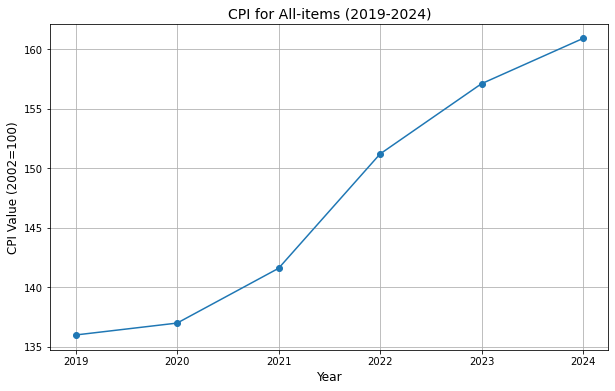

In [2]:
cpi_2019 = pd.read_csv('Sources/2019-2024CPI.csv', sep=',', skiprows=10, nrows=16)
cpi_2019 = cpi_2019.dropna()

first_row_19 = cpi_2019.iloc[0]
years_19 = ['2019', '2020', '2021', '2022', '2023', '2024']
values_19 = first_row_19.iloc[1:7].values

plt.figure(figsize=(10, 6))
plt.plot(years_19, values_19, marker='o')
product_name = first_row.iloc[0]  
plt.title(f"CPI for {product_name} (2019-2024)", fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CPI Value (2002=100)', fontsize=12)
plt.grid(True)
plt.show()

This time period has shown a much more drastic increase in inflation, likely attributed to the covid-19 pandemic. The total increment of this time period is roughly 30 CPI points, which gives us an average of 5% per annum - a significant increase from the previous time period(2009-2014). 

An important external factor worth considering within the data is seasonal adjustment; The CPI values that we are using are **not seasonally adjusted**, meaning that fluctuations in seasonal demands are not factored into CPI calculation. However, our average time frame of 5 years which spans all seasons throughout would be large enough to have averaged out any disparities or outliters in cyclical patterns[[4]](https://www.investopedia.com/terms/s/seasonal-adjustment.asp).

Based on these two graphs, and assuming that most external factors have been accounted for, we are able to make an educated deduction that the implementation of the Carbon Tax had a negative effect on grocery prices, contributing to their rise over the 2019-2024 period.

## Introduction of the Carbon Tax

Canada introduced a nationwide carbon pricing system in 2019, establishing a federal minimum price on carbon pollution starting at $20 per tonne. This system ensured that all provinces and territories had carbon pricing in place, either through their own compliant systems or the federal "backstop," aligning with national benchmark standards [[4]](https://www.canada.ca/en/environment-climate-change/services/climate-change/pricing-pollution-how-it-will-work/carbon-pollution-pricing-federal-benchmark-information.html).


## Tax on the farmers

Farmers are paying significant amounts in carbon tax, with livestock farmers averaging $726 per month and crop farmers around $2,024 according to the ACA. Greenhouse operators face the highest costs, averaging $17,173 monthly, with carbon tax accounting for as much as 40% of some farmers' energy expenses[[5]](https://www.taxpayer.com/newsroom/majority-of-canadians-want-carbon-tax-scrapped-on-farms#:~:text=The%20average%20livestock%20farmer%20can,cost%20is%20just%20carbon%20tax.).  To help offset these costs, the federal government introduced a refundable tax credit for farming businesses in provinces where the federal fuel charge applies. Eligible farmers can claim this credit for fuel expenses incurred in 2023, with the exemption taking effect for Atlantic provinces on July 1, 2023 [[6]](https://www.canada.ca/en/department-finance/programs/tax-policy/tax-credit-payment-rates-to-return-fuel-charge-proceeds-to-farmers-for-2023-24.html).



# Relevant Taxes:

Note: i think the source for the following is the same for the dataset below! (Carbon tax rates.csv i mean)

The fuel charge we are concerned about applies to marketable natural gas, not non-marketable natural gas [[6]](https://www.canada.ca/en/revenue-agency/services/forms-publications/publications/fcrates/fuel-charge-rates.html). So we will be dropping all but the relavent fields from the following carbon tax dataset:

"The rates applied in Alberta, Manitoba, Ontario, and Saskatchewan from April 1, 2019 to March 31, 2025.

New Brunswick ceased to be a listed province effective April 1, 2020, and the fuel charge was reintroduced on July 1, 2023. As such, the rates applied in New Brunswick from April 1, 2019 to March 31, 2020, and from July 1, 2023 to March 31, 2025. 

The rates applied in Newfoundland and Labrador, Nova Scotia, and Prince Edward Island from July 1, 2023 to March 31, 2025." [[6]](https://www.canada.ca/en/revenue-agency/services/forms-publications/publications/fcrates/fuel-charge-rates.html).

To determine which types of emissions would affect farmers under the Canadian carbon tax (ignoring exemptions), we need to focus on the fuels commonly used in agricultural operations such as for heating, drying crops, and running machinery.

### Fuels Likely to Affect Farmers:
- Gasoline – Used in farm vehicles and equipment (e.g., tractors, generators).

- Diesel (not explicitly listed, but possibly covered under Light/Heavy Fuel Oil):

- Light fuel oil – Often includes diesel; commonly used in farm machinery.

- Heavy fuel oil – Less common in farms but might be used in larger heating systems or equipment.

- Propane – Widely used for heating barns, greenhouses, and drying grain.

- Marketable natural gas – Used for heating and drying operations.

- Butane – Sometimes used in heating and cooking equipment in remote or smaller farms.

- Kerosene – Occasionally used for heating in older or remote systems.

- Pentanes plus / Ethane / Gas liquids – Potentially used in certain industrial or large-scale farming operations.

- Methanol – Rare, but possible in specialty fuel blends or antifreeze systems.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
carbon_tax = pd.read_csv("Sources/Carbon tax rates.csv")
carbon_tax = carbon_tax.dropna()
carbon_tax = carbon_tax.set_index('Type')
# Drop the 'Unit' column
if 'Unit' in carbon_tax.columns:
    carbon_tax = carbon_tax.drop(['Unit'], axis=1)

# Keep only the relevant fuel types
relevant_fuels = [
    'Gasoline',
    'Light fuel oil',
    'Heavy fuel oil',
    'Propane',
    'Marketable natural gas',
    'Kerosene',
    'Butane',
    'Pentanes plus',
    'Ethane',
    'Methanol'
]

carbon_tax = carbon_tax.loc[carbon_tax.index.isin(relevant_fuels)]

carbon_tax


,"April 1, 2019 to March 31, 2020","April 1, 2020 to March 31, 2021","April 1, 2021 to March 31, 2022","April 1, 2022 to March 31, 2023","April 1, 2023 to March 31, 2024","April 1, 2024 to March 31, 2025"
Type,,,,,,
Butane,0.0356,0.0534,0.0712,0.0890,0.1157,0.1424
Ethane,0.0204,0.0306,0.0408,0.0509,0.0662,0.0815
Gasoline,0.0442,0.0663,0.0884,0.1105,0.1431,0.1761
Heavy fuel oil,0.0637,0.0956,0.1275,0.1593,0.2072,0.2550
Kerosene,0.0516,0.0775,0.1033,0.1291,0.1678,0.2065
Light fuel oil,0.0537,0.0805,0.1073,0.1341,0.1738,0.2139
Marketable natural gas,0.0391,0.0587,0.0783,0.0979,0.1239,0.1525
Methanol,0.0220,0.0329,0.0439,0.0549,0.0714,0.0878
Pentanes plus,0.0356,0.0534,0.0712,0.0890,0.1157,0.1424


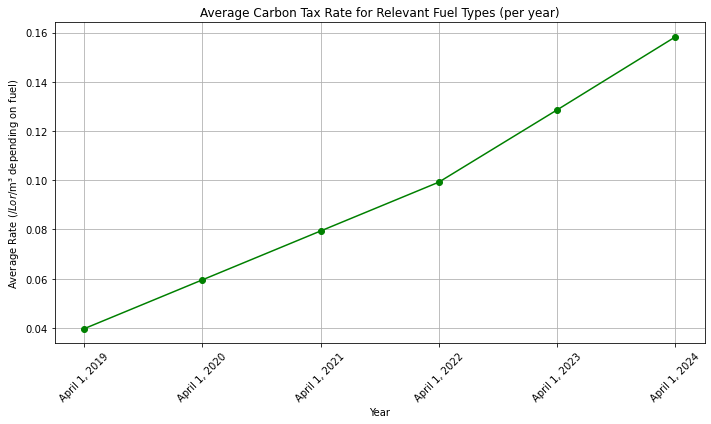

In [4]:
carbon_tax = carbon_tax.loc[carbon_tax.index.isin(relevant_fuels)]

# Compute average rate per year
average_rates = carbon_tax.mean(axis=0)

# Clean up column names for x-axis labels
years = [col.split(" to ")[0] for col in average_rates.index]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, average_rates.values, marker='o', linestyle='-', color='green')
plt.title("Average Carbon Tax Rate for Relevant Fuel Types (per year)")
plt.xlabel("Year")
plt.ylabel("Average Rate ($/L or $/m³ depending on fuel)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# PPI (Product Price Index)

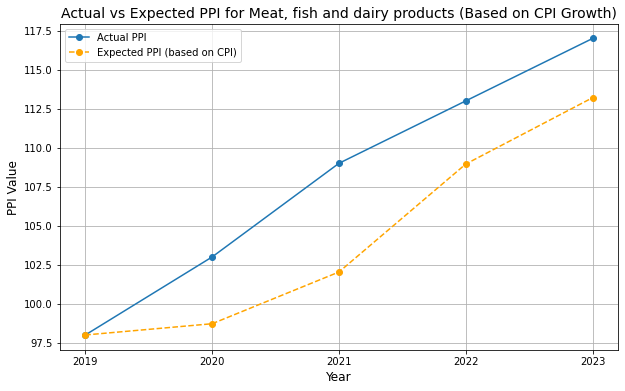

In [10]:
ppi = pd.read_csv('Sources/Industrial product price index monthly 2019 - 2023.csv', sep=',', skiprows=9, nrows=16)

first_row_ppi = ppi.iloc[1]
title = first_row_ppi.iloc[0]

ppiVal = pd.to_numeric(first_row_ppi.iloc[1:56].values)
ppi_years = ['2019', '2020', '2021', '2022', '2023']
avg_by_year = []
index = 0

for i in ppi_years[:-1]: #Skip 2023 as it only has 7 months
    end = index + 12
    avg = ppiVal[index:end].mean()
    avg_by_year.append(round(avg))
    index = end

avg_2023 = ppiVal[index:index + 7].mean()
avg_by_year.append(round(avg_2023))

cpi_2019 = pd.read_csv('Sources/2019-2024CPI.csv', sep=',', skiprows=10, nrows=16)
cpi_2019 = cpi_2019.dropna()

first_row_19 = cpi_2019.iloc[0]
product_name = first_row_19.iloc[0]
years_ppi = ['2019', '2020', '2021', '2022', '2023']

cpi_values = pd.to_numeric(first_row_19.iloc[1:6].values)

base_cpi = cpi_values[0]

base_ppi = avg_by_year[0]
expected_ppi = [(cpi / base_cpi) * base_ppi for cpi in cpi_values]

plt.figure(figsize=(10, 6))
plt.plot(years_ppi, avg_by_year[:5], marker='o', label='Actual PPI')
plt.plot(years_ppi, expected_ppi, marker='o', linestyle='--', label='Expected PPI (based on CPI)', color='orange')
plt.title(f"Actual vs Expected PPI for {title} (Based on CPI Growth)", fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('PPI Value', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

The PPI value for this time period has shown significant increase especially during the covid years. Comparing the PPI chart against the CPI chart of the exact same period, we can find the relationship between producer and consumer pricing where increased production cost would eventually be passed onto the purchasers - in our case the consumers.

This price increase was also compounded by other factors such as increasing fuel costs(as shown in the previous graph) which accelerated the hike of grocery prices which stayed consistent after the covid pandemic.

# Change in inflation rate relative to carbon tax rate

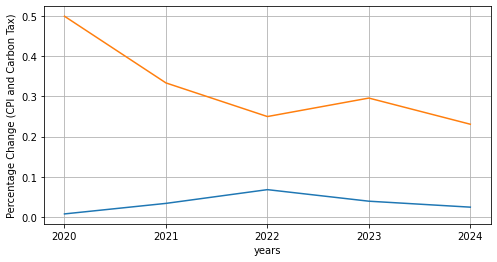

In [19]:
ct_pct = carbon_tax.pct_change(axis=1, periods=1)
ct_pct = ct_pct.mean(axis=0)

df2009 = pd.Series(data=values, index=years)
df2009 = df2009.pct_change()

years_19 = ['2019', '2020', '2021', '2022', '2023', '2024']
df2019 = pd.Series(data=values_19, index=years_19)
df2019 = df2019.pct_change()

plt.figure(figsize=(8, 4))
plt.plot(years_19, df2019.values)
plt.plot(years_19, ct_pct.values)
plt.xlabel('years')
plt.ylabel('Percentage Change (CPI and Carbon Tax)')
plt.grid(True)
plt.show()

The graph above shows the change between Carbon Tax and inflation rate, allowing us to have a side-by-side comparison to find any probable correlation between these two variables. From the graph, we observe that during the years where Carbon Tax was increased(2022), there was notable CPI reduction which rejects our hypothesis of the tax raising grocery prices.

However, we should also keep in mind that economic policies are often subjected to time lag, not necessarily reflecting immediate changes especially during the period of 2020-2021(peak of Covid pandemic). With this knowledge, we are able to make another educated guess for when the Carbon Tax was hiked in the year 2022(a year after most covid restrictions/impacts), its influence could be seen impacting the shrinking inflation rate from 2020-2022, thereby reversing the downward inflation trend and propping it back up.

# Conclusion:

Our findings have suggested that the Carbon Tax has indeed contributed to rising grocery prices, especially during the Covid-19 pandemic which further intensified price hikes. We analyzed the percentage changes in both CPI and PPI, noting that inflation was generally kept around 2% until the second period of 2019-2024. The sudden spike in inflation could be attributed to an array of external factors such as the pandemic or even the Russo-Ukrainian war.

Furthermore, we have also discovered the relationship between Carbon tax and inflation rate, offering a comparison that allows us to support our hypothesis that the tax had played a significant role in price hikes, burdening food producers which in turn passes the cost onto the unsuspecting consumers.

# Sources:

1. https://energynow.ca/2016/12/brief-history-canadian-carbon-tax/
2. https://www.thecanadianencyclopedia.ca/en/article/carbon-pricing-in-canada
3. https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810000501&pickMembers%5B0%5D=1.2&cubeTimeFrame.startYear=2019&cubeTimeFrame.endYear=2024&referencePeriods=20190101%2C20240101
4. https://www.investopedia.com/terms/s/seasonal-adjustment.asp
5. https://www.canada.ca/en/environment-climate-change/services/climate-change/pricing-pollution-how-it-will-work/carbon-pollution-pricing-federal-benchmark-information.html
6. https://www.taxpayer.com/newsroom/majority-of-canadians-want-carbon-tax-scrapped-on-farms#:~:text=The%20average%20livestock%20farmer%20can,cost%20is%20just%20carbon%20tax.
7. https://www.canada.ca/en/department-finance/programs/tax-policy/tax-credit-payment-rates-to-return-fuel-charge-proceeds-to-farmers-for-2023-24.html
8. https://www.canada.ca/en/revenue-agency/services/forms-publications/publications/fcrates/fuel-charge-rates.html
